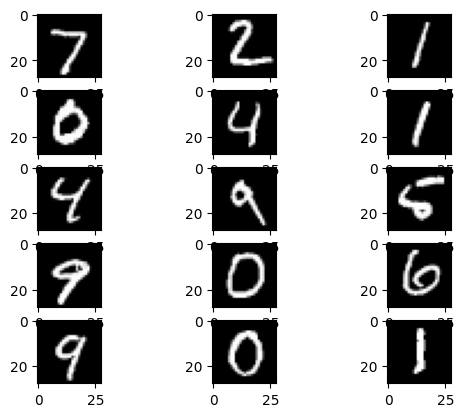

In [9]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

input_size=784 #28x28
hidden_size=500
num_classes=10 #10 digits
num_epochs=2
batch_size=100
learning_Rate=0.001

#MNIST dataset

train_dataset = torchvision.datasets.MNIST(root='./data',train=True,transform=transforms.ToTensor(),download=True)

test_dataset = torchvision.datasets.MNIST(root='./data',train=False,transform=transforms.ToTensor())

train_loader=torch.utils.data.DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=True)

test_loader=torch.utils.data.DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle=False)

examples= iter(test_loader)
examples_data,examples_targets=next(examples)

for i in range(15):
  plt.subplot(5,3,i+1)
  plt.imshow(examples_data[i][0],cmap='gray')
plt.show()

In [12]:
class NeuralNet(nn.Module):
  def __init__(self,input_size,hidden_size,num_classes):
    super(NeuralNet,self).__init__()
    self.l1=nn.Linear(input_size,hidden_size)
    self.relu=nn.ReLU()
    self.l2=nn.Linear(hidden_size,num_classes)

  def forward(self,x):
    out=self.l1(x)
    out=self.relu(out)
    out=self.l2(out)
    return out

#creating an instance
model = NeuralNet(input_size,hidden_size,num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=learning_Rate)

n_total_Steps = len(train_loader)
for epoch in range (num_epochs):
  for i,(images,labels) in enumerate(train_loader):
    images=images.reshape(-1,28*28).to(device)
    labels= labels.to(device)

    outputs = model(images)
    loss=criterion(outputs,labels)

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if (i+1)%100 ==0:
      print ("epoch =  ", epoch+1,"step = ", i+1 ,"/",n_total_Steps ,"loss=",loss)



epoch =   1 step =  100 / 600 loss= tensor(0.3624, device='cuda:0', grad_fn=<NllLossBackward0>)
epoch =   1 step =  200 / 600 loss= tensor(0.4059, device='cuda:0', grad_fn=<NllLossBackward0>)
epoch =   1 step =  300 / 600 loss= tensor(0.2500, device='cuda:0', grad_fn=<NllLossBackward0>)
epoch =   1 step =  400 / 600 loss= tensor(0.1261, device='cuda:0', grad_fn=<NllLossBackward0>)
epoch =   1 step =  500 / 600 loss= tensor(0.1684, device='cuda:0', grad_fn=<NllLossBackward0>)
epoch =   1 step =  600 / 600 loss= tensor(0.1944, device='cuda:0', grad_fn=<NllLossBackward0>)
epoch =   2 step =  100 / 600 loss= tensor(0.1422, device='cuda:0', grad_fn=<NllLossBackward0>)
epoch =   2 step =  200 / 600 loss= tensor(0.0513, device='cuda:0', grad_fn=<NllLossBackward0>)
epoch =   2 step =  300 / 600 loss= tensor(0.0637, device='cuda:0', grad_fn=<NllLossBackward0>)
epoch =   2 step =  400 / 600 loss= tensor(0.0994, device='cuda:0', grad_fn=<NllLossBackward0>)
epoch =   2 step =  500 / 600 loss= tens

In [16]:
with torch.no_grad():
  n_correct=0
  n_samples= len(test_loader.dataset)

  for images,labels in test_loader:
    images=images.reshape(-1,28*28).to(device)
    labels = labels.to(device)

    output= model(images)
    #output value,index
    _,predicted=torch.max(output,1)
    n_correct=n_correct+(predicted==labels).sum().item()

  acc=n_correct/n_samples
  print("accuracy on  ",n_samples," test images is ", 100*acc,"%")


accuracy on   10000  test images is  97.18 %
